<a href="https://colab.research.google.com/github/Malvadet/Machine-Learning/blob/main/OTUS/NSL_KDD_OTUS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [39]:
# Импортирование необходимых библиотек
import numpy as np         # Импорт библиотеки NumPy для работы с массивами и матрицами
import pandas as pd        # Импорт библиотеки Pandas для работы с таблицами данных
import matplotlib          # Импорт библиотеки Matplotlib для построения графиков и визуализации данных
import matplotlib.pyplot as plt  # Импорт модуля pyplot из библиотеки Matplotlib для упрощения работы с графиками
import pickle              # Импорт модуля pickle для сохранения и загрузки объектов Python
import datetime            # Импорт модуля datetime для работы с датами и временем

import seaborn as sns  # Импорт библиотеки Seaborn для создания красивых и информативных статистических графиков
sns.set()  # Установка стиля графиков Seaborn

# Отображение графиков в ноутбуке Jupyter
%matplotlib inline

from subprocess import check_output  # Импорт функции check_output для выполнения системных команд

import warnings  # Импорт модуля предупреждений
warnings.filterwarnings('ignore')  # Игнорирование предупреждений, связанных с pandas_profiling

def annot_plot(ax, w, h):  # Функция для добавления значений на график
    ax.spines['top'].set_visible(False)  # Убрать верхнюю границу графика
    ax.spines['right'].set_visible(False)  # Убрать правую границу графика
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')  # Добавление значения в процентах над каждым столбцом

def annot_plot_num(ax, w, h):  # Функция для добавления числовых значений на график
    ax.spines['top'].set_visible(False)  # Убрать верхнюю границу графика
    ax.spines['right'].set_visible(False)  # Убрать правую границу графика
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))  # Добавление числового значения над каждым столбцом

In [40]:
from sklearn.preprocessing import LabelEncoder       # Импорт класса LabelEncoder для преобразования категориальных признаков в числовые
from sklearn.model_selection import train_test_split # Импорт функции train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.ensemble import RandomForestClassifier  # Импорт класса RandomForestClassifier для обучения случайного леса
from sklearn.metrics import accuracy_score           # Импорт функции accuracy_score для оценки точности классификаторов
from xgboost import XGBClassifier                    # Импорт класса XGBClassifier из библиотеки XGBoost для обучения градиентного бустинга
from sklearn.tree import plot_tree                   # Импорт функции plot_tree для визуализации решающих деревьев

# Загрузка данных

* duration: продолжительность соединения в секундах
* protocol_type: тип сетевого протокола (например, TCP, UDP или ICMP)
* service: сетевой сервис на уровне приложения (например, HTTP, FTP или SMTP)
* flag: статус соединения (например, SYN_SENT, ESTABLISHED или REJ)
* src_bytes: число байт, переданных инициатором соединения
* dst_bytes: число байт, переданных целевым узлом соединения
* land: 1, если соединение исходит из/направляется на тот же хост, иначе 0
* wrong_fragment: число "плохих" фрагментов в соединении
* urgent: число пакетов с флагом URG (срочность) в соединении
* hot: число "горячих" индикаторов (например, вход в систему с привилегиями) в содержимом соединения
* num_failed_logins: число неудачных попыток входа в систему
* logged_in: 1, если успешно вошел в систему, иначе 0
* num_compromised: число "компрометированных" условий
* root_shell: 1, если был получен доступ к root-оболочке, иначе 0
* su_attempted: 1, если была попытка использования команды su, иначе 0
* num_root: число доступов к root
* num_file_creations: число созданных файлов
* num_shells: число созданных оболочек
* num_access_files: число операций доступа к файлам
* num_outbound_cmds: число исходящих команд
* is_host_login: 1, если хост-логин был успешным, иначе 0
* is_guest_login: 1, если гостевой логин был успешным, иначе 0
* count: число соединений с тем же хостом за последние две секунды
* srv_count: число соединений с тем же сервисом за последние две секунды
* serror_rate: процент соединений с ошибками в синхронизации (SYN) к общему числу соединений
* srv_serror_rate: процент соединений с ошибками в синхронизации (SYN) к общему числу соединений с тем же сервисом
* rerror_rate: процент соединений с ошибками в сбросе (RST) к общему числу соединений
* srv_rerror_rate: процент соединений с ошибками в сбросе (RST) к общему числу соединений с тем же сервисом
* same_srv_rate: процент соединений с тем же сервисом к общему числу соединений
* diff_srv_rate: процент соединений с разными сервисами к общему числу соединений

In [41]:
# Определение списка с названиями столбцов для таблицы данных
columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "target", 'ne_ponytno']

В конце списка есть столбец target, который будет содержать метки классов для задачи классификации, и столбец ne_ponytno, который является неизвестным столбцом и, возможно, был добавлен по ошибке или для каких-то дополнительных данных.

In [42]:
# Чтение тренировочных данных из файла KDDTrain+.txt, используя заданные названия столбцов 'columns'
# Удаление дубликатов с помощью метода drop_duplicates() и сохранение полученного DataFrame в переменной 'train'
train = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTrain+.txt', names=columns).drop_duplicates()

# Чтение тестовых данных из файла KDDTest+.txt, используя заданные названия столбцов 'columns'
# Сохранение полученного DataFrame в переменной 'test'
test = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTest+.txt', names=columns)

In [43]:
# Чтение дополнительного тестового набора данных из файла KDDTest-21.txt, используя заданные названия столбцов 'columns'
# Сохранение полученного DataFrame в переменной 'test_21'
test_21 = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTest-21.txt', names=columns)

In [44]:
print(f'Размер тестовой выборки в файле KDDTest+.txt: {len(test)}\n')
print(f'Размер тестовой выборки в файле KDDTest-21.txt: {len(test_21)}\n')
print(f'Размер общей тестовой выборки: {len(pd.concat([test_21,test],ignore_index=True))}\n')
print(f'Размер общей тестовой выборки после удаления дубликатов: {len(pd.concat([test_21,test],ignore_index=True).drop_duplicates())}\n')

Размер тестовой выборки в файле KDDTest+.txt: 22544

Размер тестовой выборки в файле KDDTest-21.txt: 11850

Размер общей тестовой выборки: 34394

Размер общей тестовой выборки после удаления дубликатов: 22544



In [45]:
# Объединение тренировочного и тестового наборов данных в один DataFrame
# Использование аргумента 'ignore_index=True' для переиндексации результата
df = pd.concat([train, test], ignore_index=True)

In [46]:
df.shape

(148517, 43)

# Задача многоклассовой классификации

## Преобразование типов аномалий в 5 основных классов

Эти две переменные, train_classes_mapping и test_classes_mapping, содержат многострочные строки, которые представляют соответствие между типами атак и категориями атак для тренировочного и тестового наборов данных.

train_classes_mapping содержит соответствие типов атак и категорий атак для тренировочного набора данных.
test_classes_mapping содержит соответствие типов атак и категорий атак для тестового набора данных.
Каждая строка в многострочной строке содержит два значения, разделенных пробелом. Первое значение - это тип атаки, а второе значение - это категория атаки. Например, в строке back dos, тип атаки "back" относится к категории "dos" (отказ в обслуживании).

In [47]:
train_classes_mapping = '''back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l'''

test_classes_mapping = '''apache2 dos
mailbomb dos
processtable dos
udpstorm dos
mscan probe
saint probe
httptunnel u2r
ps u2r
sqlattack u2r
xterm u2r
sendmail r2l
named r2l
snmpgetattack r2l
snmpguess r2l
xlock r2l
xsnoop r2l
worm r2l'''

In [48]:
# Объединение многострочных строк 'train_classes_mapping' и 'test_classes_mapping', добавление символа новой строки между ними
classes_mapping = train_classes_mapping+'\n'+test_classes_mapping

In [49]:
# Открытие файла 'classes_mapping.pickle' на запись в двоичном режиме ('wb') в каталоге '/content/drive/MyDrive/OTUS/utils/'
# Использование контекстного менеджера 'with' для автоматического закрытия файла после завершения операции записи
with open('/content/drive/MyDrive/OTUS/utils/classes_mapping.pickle', 'wb') as f:
    # Запись многострочной строки 'classes_mapping' в файл с использованием модуля 'pickle'
    pickle.dump(classes_mapping, f)

Этот код определяет функцию fraud_classes_mapping, которая преобразует 24+14 категорий атак в 5 основных классов (включая 'normal'). Для этого функция сопоставляет значения, основанные на данных из файла classes_mapping.pickle.

In [50]:
# Загрузка функции
from common_utils import fraud_classes_mapping

In [51]:
# Применение функции fraud_classes_mapping к столбцу 'target' тренировочного набора данных
y_tr = fraud_classes_mapping(train.target)

# Применение функции fraud_classes_mapping к столбцу 'target' тестового набора данных
y_test = fraud_classes_mapping(test.target)

# Применение функции fraud_classes_mapping к столбцу 'target' объединенного набора данных
y_df = fraud_classes_mapping(df.target)

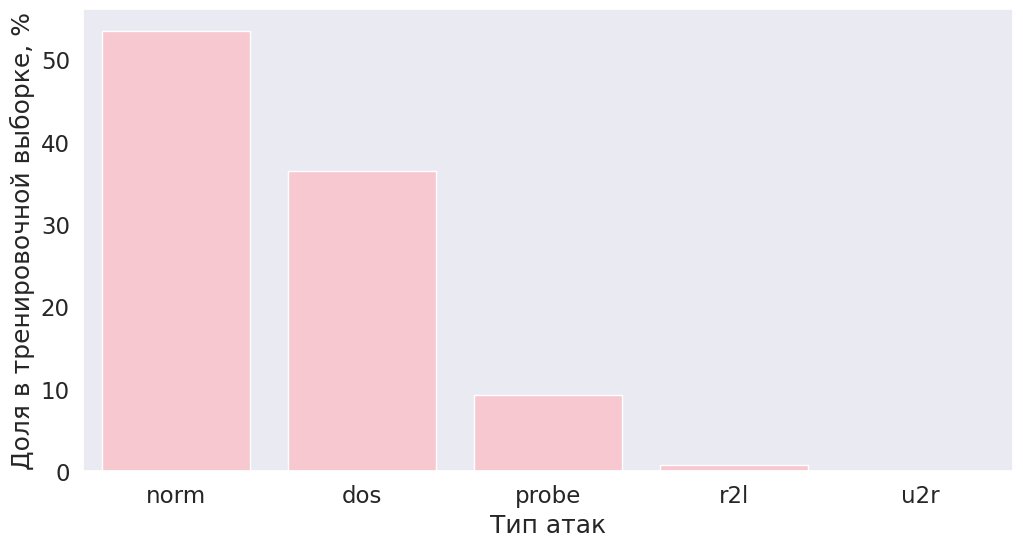

In [54]:
# Создание DataFrame с долей каждого типа атак в тренировочной выборке (в процентах)
train_class_distribution = (y_tr.value_counts() / len(y_tr) * 100).reset_index()
train_class_distribution.columns = ['Тип атак', 'Доля в тренировочной выборке, %']

# Настройка параметров графика
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))

# Построение столбчатой диаграммы с использованием библиотеки seaborn
sns.barplot(x='Тип атак', y='Доля в тренировочной выборке, %', data=train_class_distribution, color='#FFC0CB')

# Установка подписей осей
plt.ylabel('Доля в тренировочной выборке, %')
plt.xlabel('Тип атак')

# Отображение сетки на оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()

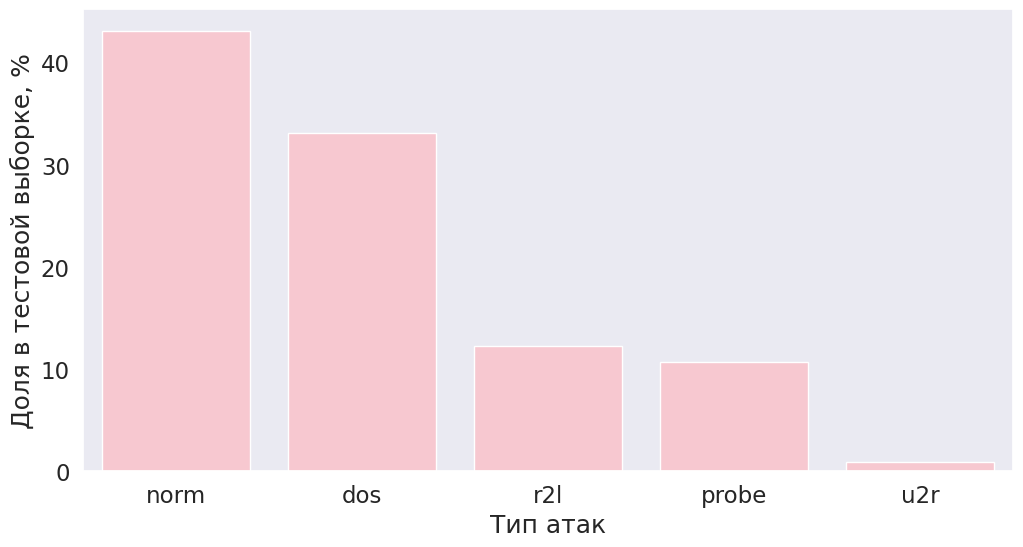

In [55]:
# Создание DataFrame с долей каждого типа атак в тренировочной выборке (в процентах)
test_class_distribution = (y_test.value_counts() / len(y_test) * 100).reset_index()
test_class_distribution.columns = ['Тип атак', 'Доля в тестовой выборке, %']

# Настройка параметров графика
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))

# Построение столбчатой диаграммы с использованием библиотеки seaborn
sns.barplot(x='Тип атак', y='Доля в тестовой выборке, %', data=test_class_distribution, color='#FFC0CB')

# Установка подписей осей
plt.ylabel('Доля в тестовой выборке, %')
plt.xlabel('Тип атак')

# Отображение сетки на оси Y
plt.grid(axis='y')

# Отображение графика
plt.show()

## Обучение модели

Этот код проходит через все столбцы в DataFrame df и проверяет, является ли тип данных столбца 'object' (т.е. категориальный). Если это так, код применяет LabelEncoder из библиотеки sklearn.preprocessing к столбцу для преобразования категориальных данных в числовые значения.

LabelEncoder работает путем преобразования каждой уникальной категории в столбце в уникальное числовое значение. Например, если у вас есть столбец с категориями "яблоко", "банан" и "груша", LabelEncoder может преобразовать их в 0, 1 и 2 соответственно.

Таким образом, код преобразует все категориальные столбцы в числовые значения, что может быть полезно при подготовке данных для использования в машинном обучении.

In [56]:
# Проход по каждому столбцу в DataFrame 'df'
for i in df.columns:
    # Проверка, является ли тип данных столбца 'object' (категориальный)
    if df[i].dtype == 'object':
        # Если столбец категориальный, применить LabelEncoder для преобразования
        # категорий в числовые значения
        df[i] = LabelEncoder().fit_transform(df[i])

Этот код создает экземпляр LabelEncoder под названием le_y. Затем он обучает (подгоняет) le_y на данных из y_df с использованием метода fit.

In [57]:
# Кодирование меток классов в числовые значения
le_y = LabelEncoder()
le_y.fit(y_df)

LabelEncoder()

Этот код разделяет исходный набор данных на обучающую и валидационную выборки с использованием функции train_test_split из библиотеки sklearn.model_selection.

In [58]:
# Разбиение выборки на обучающую и валидационную с помощью функции train_test_split
X_train, X_val, y_train, y_val = train_test_split(df[:len(train)].drop(['target'], axis=1),
                                                  le_y.transform(y_tr),
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=le_y.transform(y_tr))

* n_jobs=-1: использует все доступные ядра процессора;
* random_state=1: устанавливает seed для воспроизводимости результатов;
* class_weight={0: 0.33, 1: 0.43, 2: 0.1, 3: 0.12, 4: 0.0089}: устанавливает веса для каждого класса в соответствии с их долей в обучающей выборке. Это позволяет модели учитывать различную представленность каждого класса и уменьшает возможность недообучения модели на менее представленных классах.

In [59]:
# Определение модели случайного леса с весами классов
rfc = RandomForestClassifier(n_jobs=-1,
                              random_state=1,
                              class_weight={0: 0.33, 1: 0.43, 2: 0.1, 3: 0.12, 4: 0.0089})

In [60]:
# Обучение модели случайного леса на обучающей выборке
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.43, 2: 0.1, 3: 0.12,
                                     4: 0.0089},
                       n_jobs=-1, random_state=1)

Валидационная выборка:

In [61]:
print(f'Точность на валидационной выборке: {accuracy_score(rfc.predict(X_val),y_val):.5f}')

Точность на валидационной выборке: 0.99952


Тестовая выборка:

In [62]:
print(f"Точность на тестовой выборке: {accuracy_score(rfc.predict(df[len(train):].drop(['target'], axis=1)), le_y.transform(y_test)):.4f}")


Точность на тестовой выборке: 0.7787


In [63]:
# Предсказание классов на тестовой выборке и замер времени выполнения
start = datetime.datetime.now()
rfc.predict(df[len(train):].drop('target', axis=1))
end = datetime.datetime.now()
print(f'Время выполнения расчета для {len(y_test)} строк логов (тестовая выборка):\n{end-start}')

Время выполнения расчета для 22544 строк логов (тестовая выборка):
0:00:00.154748


In [64]:
# Использование магической команды для замера времени выполнения предсказаний на тестовой выборке
%%timeit
rfc.predict(df[len(train):].drop('target', axis=1))

178 ms ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Визуализируем важность признаков

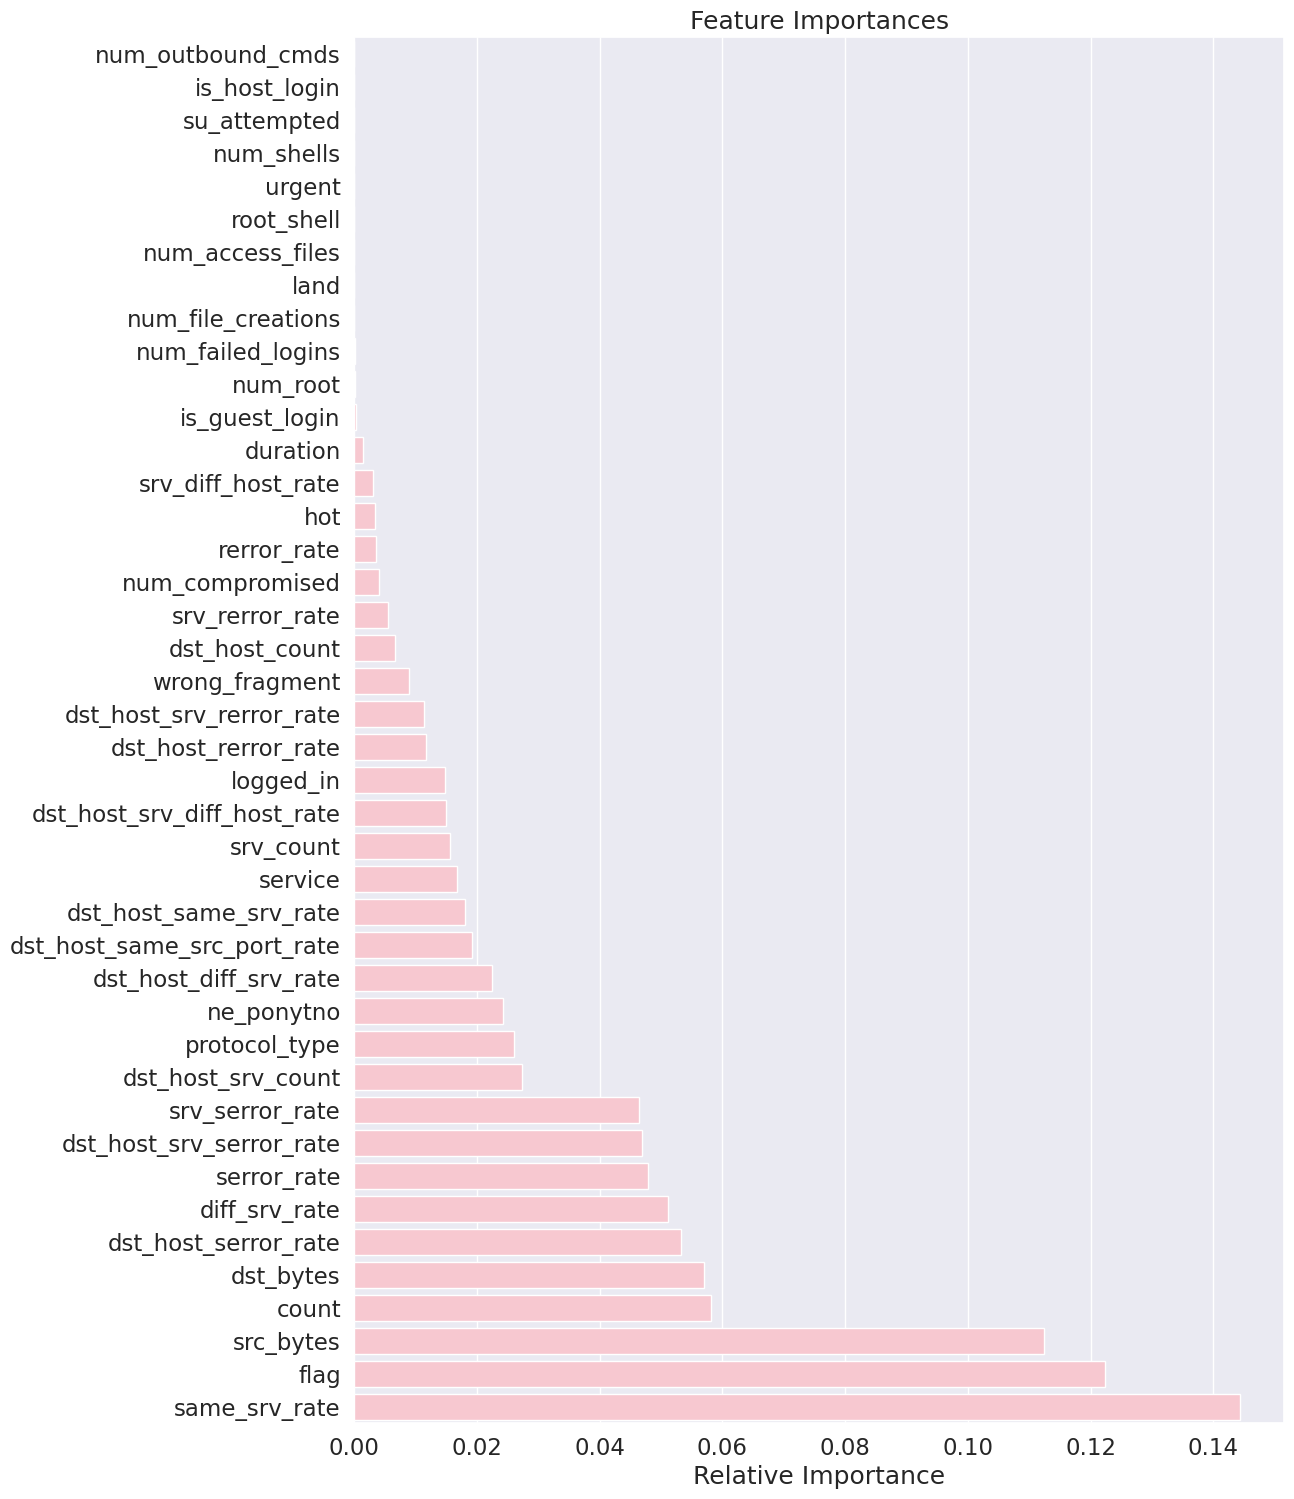

In [65]:
# Расчет важности признаков и построение графика
features = df.drop('target', axis=1).columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,18))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], color='#FFC0CB')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

Duration: продолжительность (в секундах) соединения

Service: тип сервиса, используемый при соединении, например, http, telnet и т.д.

Source bytes: количество отправленных байтов данных отправителем

Destination bytes: количество полученных байтов данных получателем

Count: количество соединений, у которых IP-адрес источника и IP-адрес назначения совпадают с IP-адресами текущего соединения в течение последних двух секунд

Same srv rate: процент соединений с тем же сервисом в Count

Serror rate: процент соединений с ошибками "SYN" в Count

Srv serror rate: процент соединений с ошибками "SYN" в Srv count (количество соединений, у которых тип сервиса такой же, как у текущего соединения, в течение последних двух секунд)

Dst host count: количество соединений из последних 100, у которых IP-адрес назначения такой же, как у текущего соединения, и у которых IP-адрес источника также совпадает с IP-адресом текущего соединения

Dst host srv count: количество соединений из последних 100, у которых IP-адрес назначения такой же, как у текущего соединения, и у которых тип сервиса также совпадает с типом сервиса текущего соединения

Dst host same src port rate: процент соединений, у которых исходный порт такой же, как у текущего соединения в функции Dst host count

Dst host serror rate: процент соединений с ошибками "SYN" в функции Dst host count

Dst host srv serror rate: процент соединений с ошибками "SYN" в функции Dst host srv count

Flag: состояние соединения в момент записи сводки (которая обычно происходит, когда соединение завершается). Различные состояния сводятся в следующем разделе

## Визуализация одного дерева решений из леса

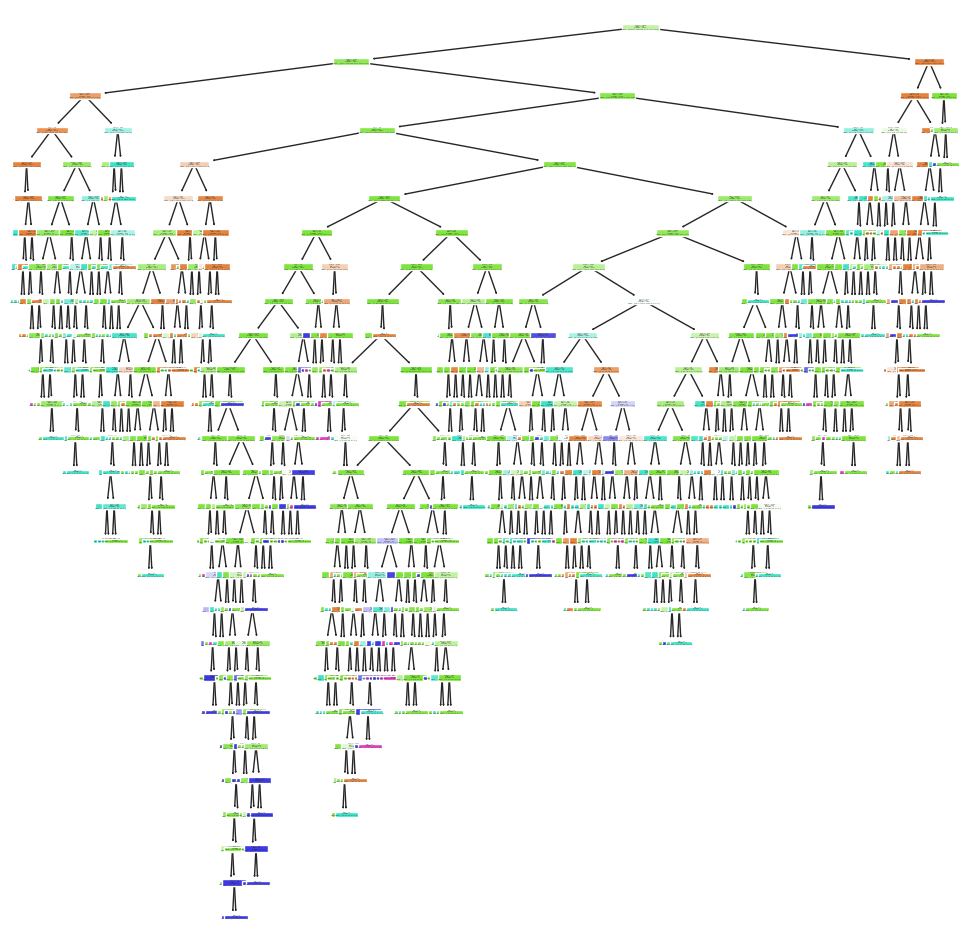

In [66]:
plt.figure(figsize=(12,12))
plot_tree(rfc.estimators_[0], filled=True)
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

# Получение предсказаний модели на тестовой выборке
y_pred = rfc.predict(df[len(train):].drop(['target'], axis=1))

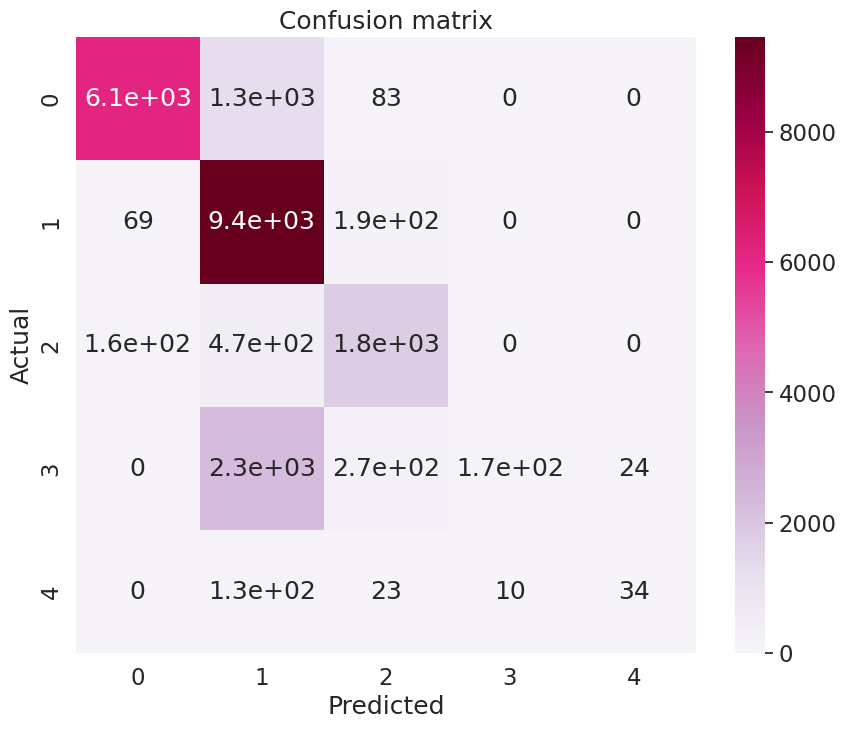

In [68]:
# Построение матрицы ошибок
cm = confusion_matrix(le_y.transform(y_test), y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='PuRd', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [69]:
# Построение отчета о классификации
print(classification_report(le_y.transform(y_test), y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7458
           1       0.69      0.97      0.81      9711
           2       0.76      0.74      0.75      2421
           3       0.95      0.06      0.12      2754
           4       0.59      0.17      0.26       200

    accuracy                           0.78     22544
   macro avg       0.79      0.55      0.57     22544
weighted avg       0.82      0.78      0.74     22544



Данная матрица ошибок получена в результате оценки работы модели случайного леса на многоклассовой задаче классификации.

* Всего было 22 544 объекта в тестовой выборке.
* Классы обозначаются числами от 0 до 4.
* Для класса 0 (первая строка) были предсказаны правильно 7458 объектов, что соответствует точности (precision) 0.96 и полноте (recall) 0.82.
* Для класса 1 (вторая строка) были предсказаны правильно 9711 объектов, что соответствует точности 0.69 и полноте 0.97.
* Для класса 2 (третья строка) были предсказаны правильно 2421 объектов, что соответствует точности 0.76 и полноте 0.74.
* Для класса 3 (четвертая строка) были предсказаны правильно 169 объектов, что соответствует точности 0.95 и полноте 0.06.
* Для класса 4 (пятая строка) были предсказаны правильно 34 объекта, что соответствует точности 0.59 и полноте 0.17.
* В целом модель верно предсказала 78% объектов, что соответствует показателю accuracy.
* Значение f1-score (среднее гармоническое между точностью и полнотой) варьируется от 0.12 до 0.89 в зависимости от класса.
* Средние значения точности и полноты (macro avg) равны 0.79 и 0.55 соответственно, а взвешенные средние (weighted avg) - 0.82 и 0.78.
* Исходя из этих показателей, можно сделать вывод, что модель имеет неплохую точность и полноту для классов 0, 1 и 2, но значительно хуже справляется с классами 3 и 4.

# Задача бинарной классификации

In [70]:
# Преобразование столбцов с 24 классами в новые классы
# Создание нового столбца с двумя классами: 1 - атака, 0 - норма
y_tr = (fraud_classes_mapping(train.target) != 'norm').astype(int)  # для тренировочной выборки
y_test = (fraud_classes_mapping(test.target) != 'norm').astype(int)  # для тестовой выборки
y_df = (fraud_classes_mapping(df.target) != 'norm').astype(int)  # для объединенной выборки

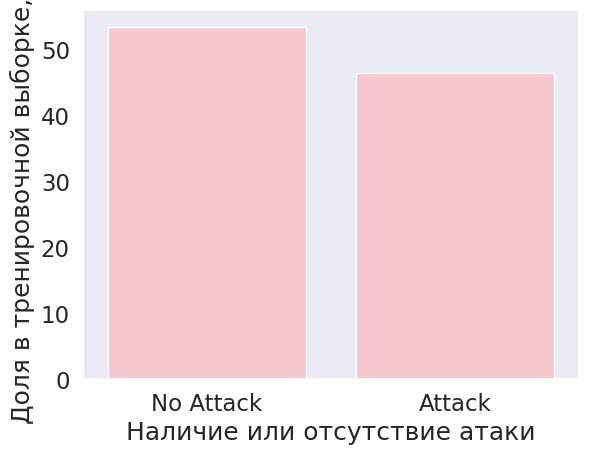

In [71]:
# Построим распределение классов в трейне
matplotlib.rcParams.update({'font.size': 20})
sns.barplot(x=['No Attack', 'Attack'], y=y_tr.value_counts(normalize=True)*100, color='#FFC0CB')
plt.ylabel('Доля в тренировочной выборке, %')
plt.xlabel('Наличие или отсутствие атаки')
plt.grid(axis='y')
plt.show()

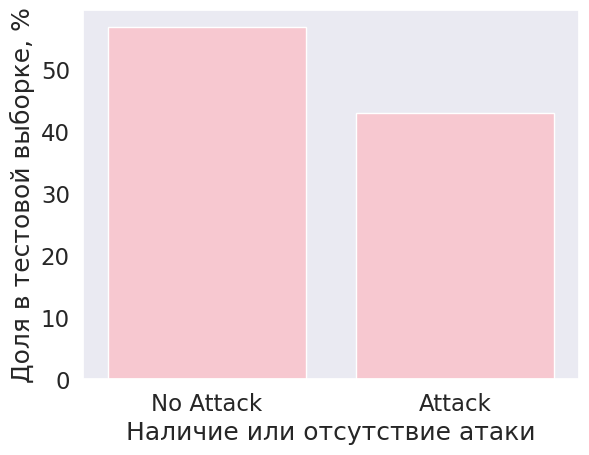

In [72]:
# Построим распределение классов в тесте
matplotlib.rcParams.update({'font.size': 20})
sns.barplot(x=['No Attack', 'Attack'], y=y_test.value_counts(normalize=True)*100, color='#FFC0CB')
plt.ylabel('Доля в тестовой выборке, %')
plt.xlabel('Наличие или отсутствие атаки')
plt.grid(axis='y')
plt.show()

## Обучение модели

In [73]:
# Разбиение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    df[:len(train)].drop(['target'], axis=1),  # признаки обучающей выборки
    y_tr,  # целевая переменная обучающей выборки
    test_size=0.2,  # размер валидационной выборки в процентах
    random_state=42,  # фиксируем случайность для воспроизводимости результатов
    stratify=y_tr  # сохраняем баланс классов при разбиении
)

In [74]:
# Обучение модели Random Forest
rfc = RandomForestClassifier(n_jobs=-1, random_state=1, class_weight={0: 0.43, 1: 0.57})

In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.43, 1: 0.57}, n_jobs=-1,
                       random_state=1)

Валидационная выборка:

In [76]:
print(f'Точность на валидационной выборке: {accuracy_score(rfc.predict(X_val),y_val):.5f}')

Точность на валидационной выборке: 0.99952


Тестовая выборка:

In [77]:
print(f"Точность на тестовой выборке: {accuracy_score(rfc.predict(df[len(train):].drop(['target'], axis=1)), y_test):.4f}")

Точность на тестовой выборке: 0.8216


In [78]:
start = datetime.datetime.now()
rfc.predict(df[len(train):].drop('target', axis=1))
end = datetime.datetime.now()
print(f'Время выполнения расчета для {len(y_test)} строк логов (тестовая выборка):\n{end-start}')

Время выполнения расчета для 22544 строк логов (тестовая выборка):
0:00:00.155744


In [79]:
%%timeit
rfc.predict(df[len(train):].drop('target', axis=1))

167 ms ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


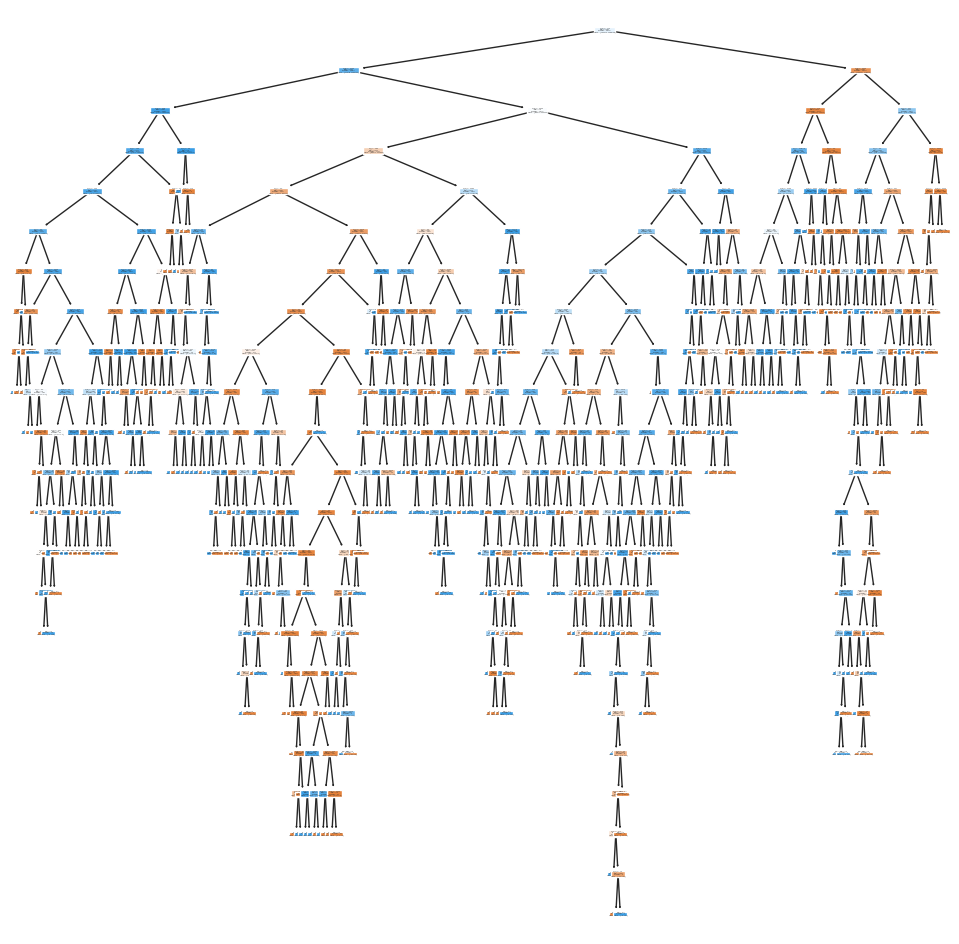

In [80]:
plt.figure(figsize=(12,12))
plot_tree(rfc.estimators_[0], filled=True)
plt.show()

In [81]:
# Получение предсказаний модели на валидационной выборке
y_pred = rfc.predict(df[len(train):].drop(['target'], axis=1))

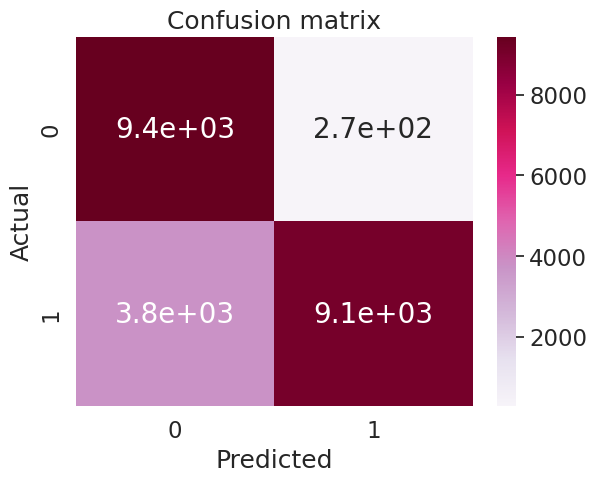

In [82]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [83]:
# Построение отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.82      9711
           1       0.97      0.71      0.82     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



Данная матрица отражает результаты бинарной классификации. В данном случае классифицируются два класса (0 и 1). В таблице выше указаны метрики precision (точность), recall (полнота) и f1-score для каждого класса, а также суммарные метрики accuracy, macro avg и weighted avg.

Для класса 0 точность составляет 0.72, что означает, что из всех объектов, которые модель отнесла к классу 0, только 72% действительно принадлежат этому классу. Полнота для класса 0 равна 0.97, что означает, что модель обнаружила 97% всех объектов, принадлежащих к этому классу. F1-мера для класса 0 равна 0.82.

Для класса 1 точность составляет 0.97, что означает, что из всех объектов, которые модель отнесла к классу 1, 97% действительно принадлежат этому классу. Полнота для класса 1 равна 0.71, что означает, что модель обнаружила только 71% всех объектов, принадлежащих к этому классу. F1-мера для класса 1 также равна 0.82.

Accuracy показывает общую точность модели и равна 0.82. Macro avg и weighted avg представляют усредненные значения метрик precision, recall и f1-score для каждого класса. Macro avg - это среднее значение, в котором каждый класс взвешивается одинаково, а weighted avg - это среднее значение, в котором каждый класс взвешивается пропорционально количеству его экземпляров. В данном случае с учетом несбалансированности классов следует обращать внимание на метрики для класса 1.

# XGBoost && CatBoost


In [269]:
import torch
from torch import nn
from tqdm import tqdm
import os

In [270]:
columns1 = list(map(lambda x: x.lower().replace('_',' '),["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target",'ne_ponytno']))
columns2 = list(map(lambda x: x.lower().replace('_',' '), """Duration
Service
Source bytes
Destination bytes
Count
Same srv rate
Serror rate
Srv serror rate
Dst host count
Dst host srv count
Dst host same src port rate
Dst host serror rate
Dst host srv serror rate
Flag
IDS detection
Malware detection
Ashula detection
Label
Source IP Address
Source Port Number
Destination IP Address
Destination Port Number
Start Time
Duration1""".split('\n')))


In [271]:
common = list(set(columns1) & set(columns2))
common

['dst host srv count',
 'dst host srv serror rate',
 'dst host same src port rate',
 'dst host count',
 'service',
 'flag',
 'duration',
 'count',
 'dst host serror rate',
 'same srv rate',
 'serror rate',
 'srv serror rate']

In [272]:
train = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTrain+.txt', names=columns1)
test = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTest+.txt', names=columns1)

In [273]:
# Создание маппинга классов мошенничества на числа для обучающей выборки
y_tr = fraud_classes_mapping(train.target)

# Создание маппинга классов мошенничества на числа для тестовой выборки
y_test = fraud_classes_mapping(test.target)

# Объединение обучающей и тестовой выборок в одну
df = pd.concat([train,test],ignore_index=True)

# Создание маппинга классов мошенничества на числа для объединенной выборки
y_df = fraud_classes_mapping(df.target)

<Axes: >

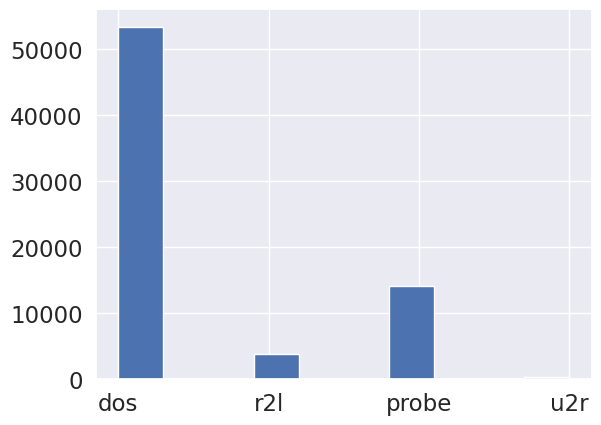

In [274]:
# Построение гистограммы распределения классов мошенничества в объединенной выборке
y_df[y_df!='norm'].hist()

In [275]:
# Оставляем только общие столбцы в трех датафреймах
train = train[common]
test = test[common]
df = df[common]

In [276]:
# Проходим по всем столбцам и если тип данных - object, применяем LabelEncoder
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [277]:
le_y = LabelEncoder() # Создание объекта класса LabelEncoder для преобразования целевого столбца
le_y.fit(y_df) # Обучение объекта LabelEncoder на целевом столбце
with open('target_encoder.pcl', 'wb') as fd: # Сохранение обученного объекта LabelEncoder в файл 'target_encoder.pcl' с помощью модуля pickle
    pickle.dump(le_y, fd)

In [278]:
X_train, X_test, y_train, y_test = df[:len(train)], df[len(train):],le_y.transform(y_tr) , le_y.transform(y_test)

In [279]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(max_depth=5, n_estimators=1000, learning_rate=0.1, reg_alpha=1, reg_lambda=1)

In [280]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [281]:
y = xgbc.predict(X_train)

In [213]:
print(f"Точность на тестовой выборке: {accuracy_score(xgbc.predict(df[len(train):]), y_test):.4f}")
start = datetime.datetime.now()
xgbc.predict(df[len(train):])
end = datetime.datetime.now()
print(f'Время выполнения расчета для {len(y_test)} строк логов (тестовая выборка):\n{end-start}')

Точность на тестовой выборке: 0.7388
Время выполнения расчета для 22544 строк логов (тестовая выборка):
0:00:01.203426


In [282]:
%%timeit
xgbc.predict(df[len(train):])

1.43 s ± 362 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


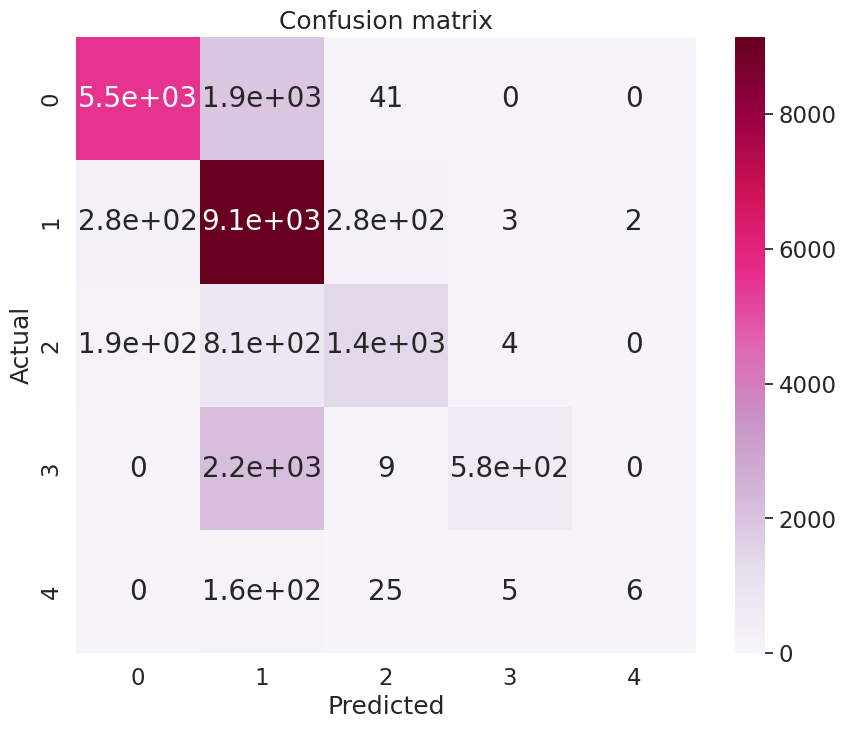

In [288]:
from sklearn.metrics import confusion_matrix

# Получение предсказаний модели на тестовой выборке
y_pred = xgbc.predict(X_test)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [289]:
# Построение отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      7458
           1       0.64      0.94      0.76      9711
           2       0.80      0.59      0.68      2421
           3       0.98      0.21      0.35      2754
           4       0.75      0.03      0.06       200

    accuracy                           0.74     22544
   macro avg       0.82      0.50      0.53     22544
weighted avg       0.79      0.74      0.72     22544



В данном случае, модель имеет высокую точность в классификации нормальных соединений (класс 0) и категории dos-атак (класс 1), но показывает сравнительно плохие результаты в классификации остальных категорий (классы 2, 3 и 4). Особенно плохо модель справляется с классами 3 и 4, имеющими очень низкую recall, что свидетельствует о том, что модель часто ошибается, не распознавая эти классы.

Макро-усредненный f1-score и recall оказываются низкими, что может говорить о низком качестве модели в целом, а взвешенный f1-score, который учитывает дисбаланс классов, получается еще ниже. Это может быть связано с тем, что выборка содержит большое количество примеров из класса 1 и очень мало примеров из класса 4, что создает значительный дисбаланс классов.

Для более полного понимания работы модели можно построить матрицу ошибок, которая показывает, сколько примеров было правильно/неправильно классифицировано в каждом из классов.

In [311]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [303]:
train = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTrain+.txt', names=columns1)
test = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTest+.txt', names=columns1)
df = pd.concat([train,test],ignore_index=True)

In [304]:
# Проходим по всем столбцам и если тип данных - object, применяем LabelEncoder
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [305]:
le_y = LabelEncoder() # Создание объекта класса LabelEncoder для преобразования целевого столбца
le_y.fit(y_df) # Обучение объекта LabelEncoder на целевом столбце

LabelEncoder()

In [307]:
# Разбиение выборки на обучающую и валидационную с помощью функции train_test_split
X_train, X_val, y_train, y_val = train_test_split(df[:len(train)].drop(['target'], axis=1),
                                                  le_y.transform(y_tr),
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=le_y.transform(y_tr))

In [ ]:
# Обучение модели
model.fit(X_train, y_train, early_stopping_rounds=50)

In [ ]:
# Отбор признаков
from catboost import Pool
feature_names = X_train.columns
train_pool = Pool(X_train, y_train, feature_names=common)
importances = model.get_feature_importance(train_pool)
selected_features = importances.argsort()[-10:] # выбираем топ-10 признаков
X_train_opt = X_train.iloc[:, selected_features]
X_test_opt = X_test.iloc[:, selected_features]

In [ ]:
# Обучение модели
model.fit(X_train_opt, y_train, eval_set=(X_test_opt, y_test), early_stopping_rounds=100)

In [333]:
# Предсказание на тестовой выборке
y_pred = model.predict(df[len(train):].drop(['target'], axis=1))

In [334]:
from sklearn.metrics import accuracy_score  
# Оценка качества модели на тестовой выборке
print(f"Точность на тестовой выборке: {accuracy_score(model.predict(df[len(train):]), y_test):.4f}")

Точность на тестовой выборке: 0.7884


In [328]:
%%timeit
model.predict(df[len(train):])

106 ms ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


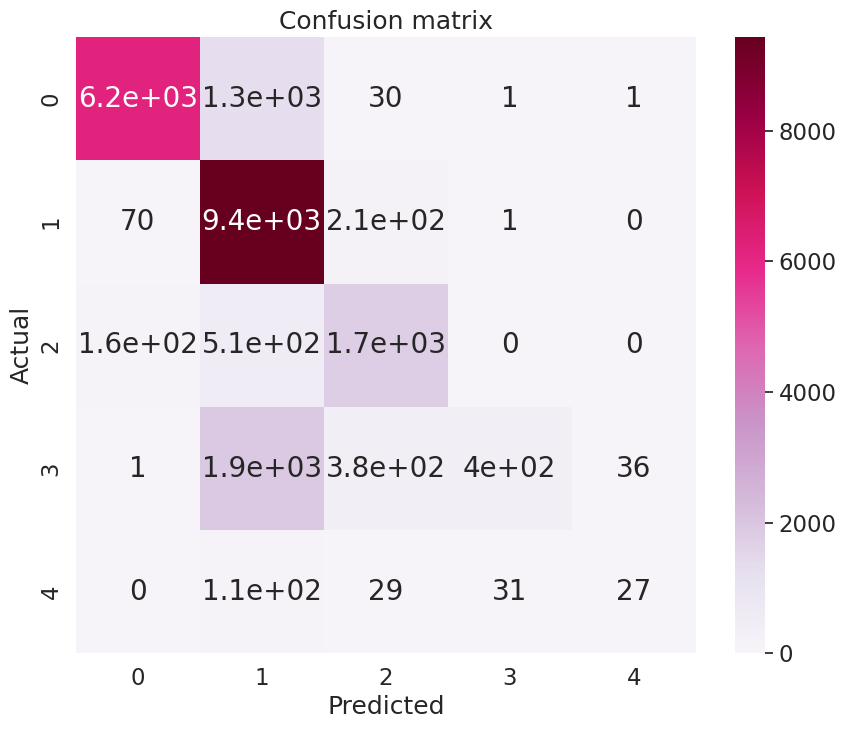

In [335]:
# Получение предсказаний модели на тестовой выборке
y_pred = model.predict(df[len(train):])

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [336]:
# Построение отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7458
           1       0.71      0.97      0.82      9711
           2       0.73      0.72      0.73      2421
           3       0.92      0.15      0.25      2754
           4       0.42      0.14      0.20       200

    accuracy                           0.79     22544
   macro avg       0.75      0.56      0.58     22544
weighted avg       0.82      0.79      0.76     22544



In [ ]:
!pip install hyperopt

# PyTorch

In [337]:
from common_utils import fraud_classes_mapping

In [338]:
import torch
from torch import nn
from tqdm import tqdm
import os
from IPython import display
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from torch.utils.data import  DataLoader

In [339]:
columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target",'ne_ponytno']

In [340]:
train = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTrain+.txt', names=columns)
test = pd.read_csv('/content/drive/MyDrive/OTUS/data/KDD/KDDTest+.txt', names=columns)

In [341]:
df = pd.concat([train,test]).drop('target',axis=1)

In [342]:
# Преобразование столбцов с 24 классами в новые классы
y_train = fraud_classes_mapping(train.target)
y_test = fraud_classes_mapping(test.target)

In [343]:
# Выбираем индексы строк, где целевая переменная не равна 'norm'
idx_train = y_train[y_train != 'norm'].index
idx_test = y_test[y_test != 'norm'].index

In [344]:
# Извлекаем соответствующие признаки и целевую переменную
y_train = y_train.loc[idx_train]
X_train = train.drop('target',axis=1).loc[idx_train]

y_test = y_test.loc[idx_test]
X_test = test.drop('target',axis=1).loc[idx_test]

In [345]:
# Определение признаков, требующих One-Hot Encoding
names_one_hot_encoding=[]
for col in df:
    # print(col, type(df[col].values[0]), len(df[col].unique()))
    if len(df[col].unique()) <= 72:
        names_one_hot_encoding.append(col)
print(names_one_hot_encoding)

['protocol_type', 'service', 'flag', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'ne_ponytno']


Preprocessing

In [346]:
# Инициализация One-Hot-Encoder для категориальных признаков
enc = OneHotEncoder()

# Обучение One-Hot-Encoder на признаках, для которых число уникальных значений <= 72
enc.fit(df[names_one_hot_encoding])

# Инициализация StandardScaler для масштабирования числовых признаков
ss = StandardScaler()

# Обучение StandardScaler на числовых признаках, исключая категориальные
ss.fit(df.drop(names_one_hot_encoding, axis=1))

# Функция предобработки данных, которая масштабирует числовые признаки и делает One-Hot-Encoding категориальных признаков
def preproc(data):
    # Масштабирование числовых признаков
    scaled = ss.transform(data.drop(names_one_hot_encoding, axis=1))
    # One-Hot-Encoding категориальных признаков и объединение с числовыми признаками
    encoded = enc.transform(data[names_one_hot_encoding]).toarray()
    return np.concatenate([scaled, encoded], axis=1)

# Инициализация LabelEncoder для кодирования целевой переменной
loen = LabelEncoder()

# Обучение LabelEncoder на целевой переменной тренировочной выборки
loen.fit(y_train.values)

LabelEncoder()

In [347]:
X_train = preproc(X_train) # Препроцессинг обучающей выборки
X_test = preproc(X_test) # Препроцессинг тестовой выборки

y_train = loen.transform(y_train.values) # Кодирование меток классов для обучающей выборки
y_test = loen.transform(y_test.values) # Кодирование меток классов для тестовой выборки

Net Structure

In [348]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here
        self.seq = nn.Sequential(
            nn.Linear(236, 130),
            nn.ReLU(),
            nn.Linear(130, 12),
            nn.ReLU(),
            nn.Linear(12, 12),
            nn.ReLU(),
            nn.Linear(12, 4),
            nn.Sigmoid()
        )  
    def forward(self, x):
        out = self.seq(x)
        return out

Fitting

In [349]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# device = torch.device("cpu")
model = NN().to(device)
opt = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [350]:
# выбор GPU если доступна, в противном случае выбор CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# device = torch.device("cpu")
# создание экземпляра модели NN и перемещение ее на выбранное устройство
model = NN().to(device)
# выбор оптимизатора
opt = torch.optim.Adam(model.parameters())
# выбор функции потерь
criterion = nn.CrossEntropyLoss()

Этот код создает объект DataLoader из обучающих данных X_train и y_train, чтобы загружать их батчами размером 32 для обучения нейронной сети. Объект DataLoader предоставляет более эффективный способ загрузки данных и параллельной обработки их во время обучения нейронной сети. Кроме того, код приводит данные к формату float и отправляет их на GPU (если доступен).

In [351]:
TrainLoader = DataLoader(
    torch.utils.data.TensorDataset(
        torch.tensor(X_train, requires_grad=True).float().to(device),
        torch.tensor(y_train).to(device)
    ),
    batch_size=32,
    shuffle=True
)
# TestLoader = DataLoader(torch.utils.data.TensorDataset(torch.tensor(X_test,requires_grad=True).float().to(device),torch.tensor(y_test).to(device)),batch_size=1024)

Данный код загружает наилучшую модель, сохраненную в переменной best_model, затем применяет ее для предсказания меток классов на тестовой выборке X_test. Ответ представляет собой долю правильных ответов (accuracy) между предсказанными моделью метками классов и истинными метками классов y_test.

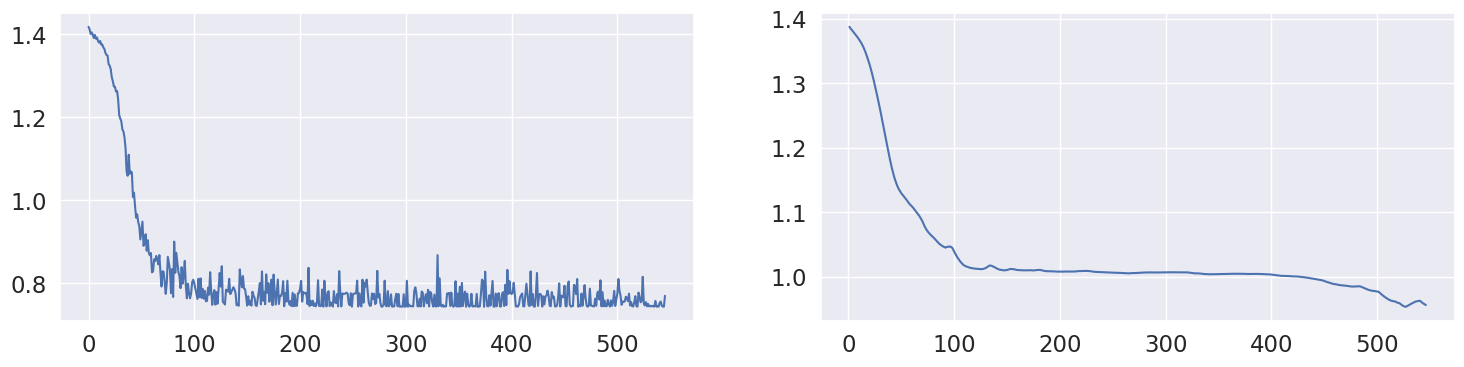

546it [17:49,  1.96s/it]


KeyboardInterrupt: ignored

In [352]:
# Задаем количество эпох и списки для хранения значений функции потерь
n_epochs = 5
losses=[]
losses_val=[float('+inf')]

# Цикл по эпохам
for epoch in range(n_epochs):
      # Цикл по батчам в TrainLoader
      for n_iter, data in tqdm(enumerate(TrainLoader)):
          # Получаем вход и выход
          inp = data[0]
          # Обнуляем градиенты
          opt.zero_grad()
          # Получаем предсказание
          pred = model(inp)
          # Рассчитываем функцию потерь
          loss = criterion(pred, data[1])
          # Добавляем значение функции потерь в список
          losses.append(loss.item())
          # Обратное распространение ошибки
          loss.backward()
          # Обновление параметров модели
          opt.step()
          
          # Рассчитываем функцию потерь на валидационном датасете
          opt.zero_grad()
          pred = model(torch.tensor(X_test, requires_grad=True).float().to(device))
          loss = criterion(pred, torch.tensor(y_test).to(device))
          # Сохраняем веса модели с минимальной функцией потерь на валидационном датасете
          if loss.item() < min(losses_val):
              best_model = model.state_dict()       
          # Добавляем значение функции потерь на валидационном датасете в список
          losses_val.append(loss.item())        
          
          # Очищаем вывод в текущей ячейке
          display.clear_output(wait=True)
          # Рисуем графики функций потерь на тренировочном и валидационном датасетах
          f = plt.figure(figsize=(18, 4))
          ax1 = f.add_subplot(121)
          ax2 = f.add_subplot(122)
          ax1.plot(losses)
          ax2.plot(losses_val)
          plt.show()


In [353]:
model.load_state_dict(best_model)
accuracy_score(model(torch.tensor(X_test).float().to(device)).detach().max(axis=1).indices.cpu().numpy(),y_test)

0.7567209537910076

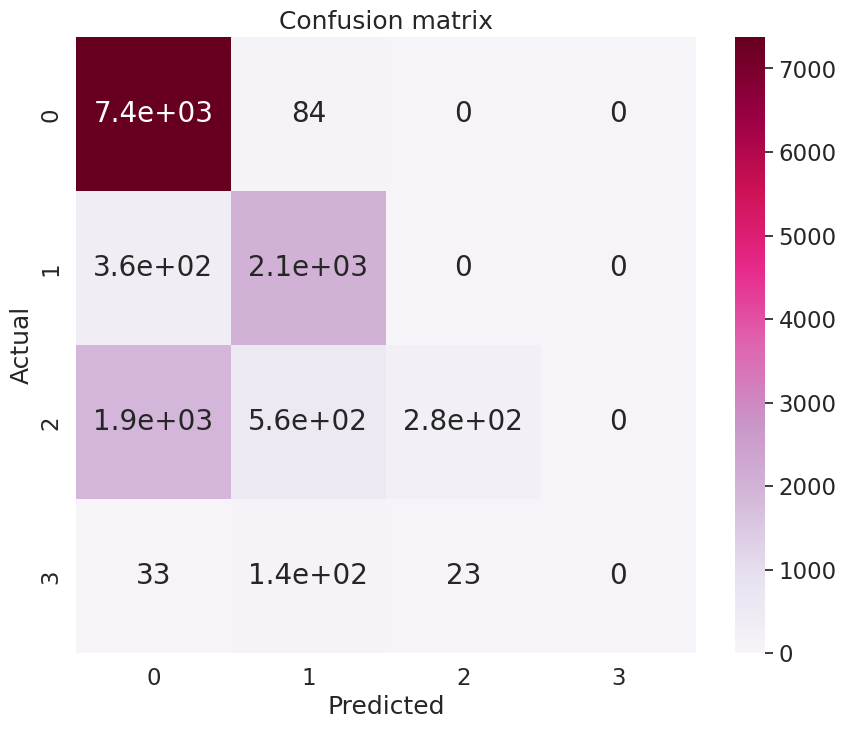

In [356]:
# Получение предсказаний модели на тестовой выборке
y_pred = model(torch.tensor(X_test).float().to(device)).detach().max(axis=1).indices.cpu().numpy()

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()